# Lesson 10 - Logistic Regression
Austin Derrow-Pinion

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('./Data/Iris-cleaned.csv')
df['species'] = df.species.astype('category')
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Part (a): Using TensorFlow and gradient descent, train a logistic regression classifier for predicting the species of an iris from its leaf features.

In [23]:
df_s = df.copy()
df_s['sepal length'] = (df_s['sepal length'] - df_s['sepal length'].mean()) / df_s['sepal length'].std()
df_s['sepal width'] = (df_s['sepal width'] - df_s['sepal width'].mean()) / df_s['sepal width'].std()
df_s['petal length'] = (df_s['petal length'] - df_s['petal length'].mean()) / df_s['petal length'].std()
df_s['petal width'] = (df_s['petal width'] - df_s['petal width'].mean()) / df_s['petal width'].std()

In [24]:
# one-hot-encode species
df_h = pd.get_dummies(df_s)
df_h.head()

,sepal length,sepal width,petal length,petal width,species_setosa,species_versicolor,species_virginica
0,-0.897674,1.028611,-1.336794,-1.308593,1.0,0.0,0.0
1,-1.139200,-0.124540,-1.336794,-1.308593,1.0,0.0,0.0
2,-1.380727,0.336720,-1.393470,-1.308593,1.0,0.0,0.0
3,-1.501490,0.106090,-1.280118,-1.308593,1.0,0.0,0.0
4,-1.018437,1.259242,-1.336794,-1.308593,1.0,0.0,0.0


In [25]:
df_h.dtypes

sepal length          float64
sepal width           float64
petal length          float64
petal width           float64
species_setosa        float64
species_versicolor    float64
species_virginica     float64
dtype: object

In [26]:
# define inputs and outputs
inputs = df_h.values[:, :4]
output = df_h.values[:, 4:]

print("inputs:\n", inputs[0:3, 0:3])
print("\noutputs:\n", output[0:3, 0:3])

print("input shape:", inputs.shape)
print("output shape:", output.shape)

inputs:
 [[-0.89767388  1.02861128 -1.33679402]
 [-1.13920048 -0.12454038 -1.33679402]
 [-1.38072709  0.33672028 -1.39346985]]

outputs:
 [[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
input shape: (150, 4)
output shape: (150, 3)


In [27]:
# Tensorflow computation graph

# y = softmax(w*x + b)
x = tf.constant(inputs, dtype='float32', shape=[150, 4])
y = tf.constant(output, dtype='float32', shape=[150, 3])

w = tf.Variable(tf.truncated_normal([4, 3], stddev=0.001))
b = tf.Variable(tf.truncated_normal([3], stddev=0.001))

# error loss function
MSE = tf.reduce_mean(tf.square(tf.nn.softmax(tf.matmul(x, w) + b) - y))

# define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.001, epsilon=1e-10).minimize(MSE)

y_pred = tf.nn.softmax(tf.matmul(x, w) + b)

init = tf.initialize_all_variables()

In [28]:
sess = tf.Session()
sess.run(init)

In [9]:
MAXSTEPS = 40000
for step in range(MAXSTEPS + 1):
    (_, mse, w0, b0) = sess.run([optimizer, MSE, w, b])
    if (step % 1000) == 0:
        print('step = %-5d MSE = %-10f' % (step, mse))
print('done!')

step = 0     MSE = 0.222060  
step = 1000  MSE = 0.064329  
step = 2000  MSE = 0.037964  
step = 3000  MSE = 0.026205  
step = 4000  MSE = 0.019910  
step = 5000  MSE = 0.016121  
step = 6000  MSE = 0.013689  
step = 7000  MSE = 0.012066  
step = 8000  MSE = 0.010952  
step = 9000  MSE = 0.010171  
step = 10000 MSE = 0.009613  
step = 11000 MSE = 0.009210  
step = 12000 MSE = 0.008917  
step = 13000 MSE = 0.008706  
step = 14000 MSE = 0.008559  
step = 15000 MSE = 0.008461  
step = 16000 MSE = 0.008399  
step = 17000 MSE = 0.008328  
step = 18000 MSE = 0.008191  
step = 19000 MSE = 0.008026  
step = 20000 MSE = 0.007858  
step = 21000 MSE = 0.007694  
step = 22000 MSE = 0.007535  
step = 23000 MSE = 0.007381  
step = 24000 MSE = 0.007234  
step = 25000 MSE = 0.007092  
step = 26000 MSE = 0.006955  
step = 27000 MSE = 0.006825  
step = 28000 MSE = 0.006700  
step = 29000 MSE = 0.006581  
step = 30000 MSE = 0.006467  
step = 31000 MSE = 0.006359  
step = 32000 MSE = 0.006256  
step = 330

In [41]:
# make predictions
predictions = sess.run(y_pred)

In [42]:
# check mean square error
mse = ((output - predictions) ** 2).mean()
rmse = np.sqrt(mse)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('output\'s standard deviation = ', output.std())
print('difference between RMSE of model and std of LogRatios: ', (output.std() - rmse))

MSE =  0.221879298139
RMSE =  0.471040654444
output's standard deviation =  0.471404520791
difference between RMSE of model and std of LogRatios:  0.000363866346642


#### Part (b):  Repeat part (a) using Sklearn

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
LR = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [36]:
LR.fit(inputs, df.species.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
# predict species probabilities
predictions_sk = LR.predict_proba(inputs)

In [46]:
mse_sk = mean_squared_error(output, predictions_sk)
print("Sklearn mse: ", mse_sk)

Sklearn mse:  0.0187161148142


#### Part (c): Compate Tensorflow's MSE to that of Sklearn

In [47]:
print("TensorFlow's MSE: ", mse)
print("Sklearn's MSE: ", mse_sk)

TensorFlow's MSE:  0.221879298139
Sklearn's MSE:  0.0187161148142


#### Part (d): Compare TensorFlow's error rate to that of Sklearn

accuracy = (# of correct predictions) / (total # of predictions)

error rate = 1 - accuracy

In [54]:
accuracy = accuracy_score(np.argmax(output, axis=1), np.argmax(predictions, axis=1))
accuracy_sk = accuracy_score(np.argmax(output, axis=1), np.argmax(predictions_sk, axis=1))

print("TensorFlow's accuracy: ", accuracy)
print("Sklearn's accuracy: ", accuracy_sk)

TensorFlow's accuracy:  0.726666666667
Sklearn's accuracy:  0.973333333333


#### Visualize Results

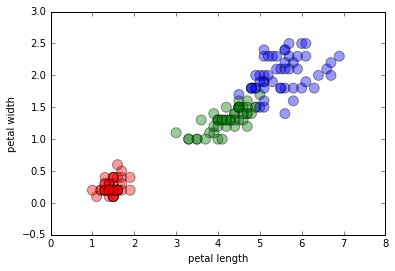

In [16]:
colors = np.array(['r', 'g', 'b'])
color_map = colors[predictions.argmax(axis=1)]
df.plot.scatter(x='petal length', y='petal width', c=color_map, s=100, alpha=0.4)